In [1]:
import pandas as pd

### What this notebook is for:
- Collect coke prices and average income around the world
- Calculate the number of coke an average-eraning person could afford with their dialy income around the world.


# Step 1: Scraping

## Collect coke price data

In [2]:
coke_url = "https://www.numbeo.com/cost-of-living/prices_by_country.jsp?displayCurrency=USD&itemId=6"

In [3]:
tables = pd.read_html(coke_url)
coke_df = tables[1]
coke_df.head(2)

,Rank,Country,Coke/Pepsi (0.33 liter bottle)
0,NaN,Kazakhstan,0.64
1,NaN,Portugal,1.51


In [4]:
coke_df = coke_df.drop(columns='Rank')

In [5]:
# clean up column names
coke_df = coke_df.rename(columns={'Country': "country", 'Coke/Pepsi (0.33 liter bottle)': "price"})
coke_df.head()

,country,price
0,Kazakhstan,0.64
1,Portugal,1.51
2,Greece,1.92
3,Latvia,1.28
4,Iran,0.91


## Collect salary data

In [6]:
salary_url = "https://www.numbeo.com/cost-of-living/country_price_rankings?itemId=105"
salary_tables = pd.read_html(salary_url)
salary_df = salary_tables[1]
salary_df.head()

,0,1,2,3
0,1.0,Switzerland,NaN,"5,935.58 $"
1,2.0,Singapore,NaN,"5,009.32 $"
2,3.0,United States,NaN,"4,185.35 $"
3,4.0,Qatar,NaN,"3,977.93 $"
4,5.0,Iceland,NaN,"3,850.25 $"


In [7]:
salary_df = salary_df.drop(columns=[0,2])
salary_df = salary_df.rename(columns={1: "country", 3: "mo_salary"})
salary_df.head()

,country,mo_salary
0,Switzerland,"5,935.58 $"
1,Singapore,"5,009.32 $"
2,United States,"4,185.35 $"
3,Qatar,"3,977.93 $"
4,Iceland,"3,850.25 $"


# Step 2: Cleaning

## Cleaning country names

In [8]:
# Merging datasets
merged = pd.merge(coke_df, salary_df, how="left", on="country")
merged

,country,price,mo_salary
0,Kazakhstan,0.64,467.31 $
1,Portugal,1.51,"1,067.16 $"
2,Greece,1.92,881.98 $
3,Latvia,1.28,"1,025.95 $"
4,Iran,0.91,313.94 $
...,...,...,...
103,Denmark,3.47,"3,511.97 $"
104,Dominican Republic,0.92,369.87 $
105,Mexico,0.99,677.77 $
106,Montenegro,2.04,653.89 $


In [9]:
# getting rid of dollar sign
cleaned_df = merged.replace({'[$]':'',',':''},regex=True)

In [10]:
cleaned_df.head()

,country,price,mo_salary
0,Kazakhstan,0.64,467.31
1,Portugal,1.51,1067.16
2,Greece,1.92,881.98
3,Latvia,1.28,1025.95
4,Iran,0.91,313.94


In [11]:
# Fix data type
cleaned_df['mo_salary']=cleaned_df['mo_salary'].astype(float)
cleaned_df['price']=cleaned_df['price'].astype(float)

In [12]:
# Clean up columns
cleaned_df['country'] = cleaned_df.country.str.replace(" [(]China[)]","").str.replace(" [(]Disputed Territory[)]","")
cleaned_df.sample(10)

/var/folders/0h/2v5mxpvs49s0_gs3lqjt474h0000gn/T/ipykernel_73646/938645974.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaned_df['country'] = cleaned_df.country.str.replace(" [(]China[)]","").str.replace(" [(]Disputed Territory[)]","")


,country,price,mo_salary
10,Nepal,0.44,193.09
77,Albania,1.35,433.49
53,Israel,2.74,2632.57
9,Chile,1.34,680.73
76,Mauritius,1.02,501.54
39,Croatia,2.23,1039.08
4,Iran,0.91,313.94
97,Romania,1.46,776.97
59,Iceland,2.44,3850.25
36,Kuwait,0.54,2078.20


# Step 3: Data Analysis

In [27]:
# calculate the affordability of coke by dividing daily income by local coke prices
cleaned_df['bottle_per_day'] = cleaned_df['mo_salary']/21/cleaned_df['price']
cleaned_df['bottle_per_day'] = cleaned_df['bottle_per_day'].round()

# calculate daily income by dividing average mothly income by 21 (working days in a month)
cleaned_df['daily_salary'] = cleaned_df['mo_salary']/21
cleaned_df['daily_salary'] = cleaned_df['daily_salary'].round(2)
cleaned_df.head()

,country,price,mo_salary,bottle_per_day,daily_salary
0,Kazakhstan,0.64,467.31,35.0,22.25
1,Portugal,1.51,1067.16,34.0,50.82
2,Greece,1.92,881.98,22.0,42.00
3,Latvia,1.28,1025.95,38.0,48.85
4,Iran,0.91,313.94,16.0,14.95


In [87]:
cleaned_df['bottle_per_day'].describe()

count    108.000000
mean      46.287037
std       35.346893
min        7.000000
25%       25.000000
50%       33.000000
75%       58.250000
max      183.000000
Name: bottle_per_day, dtype: float64

In [90]:
cleaned_df['price'].describe()

count    108.000000
mean       1.327870
std        0.822907
min        0.200000
25%        0.685000
50%        1.070000
75%        1.920000
max        4.500000
Name: price, dtype: float64

In [88]:
cleaned_df.sort_values(by=['bottle_per_day'], ascending=False).dropna().head(10)

,country,price,mo_salary,bottle_per_day,daily_salary
36,Kuwait,0.54,2078.20,183.0,98.96
92,Qatar,1.04,3977.93,182.0,189.43
43,United Arab Emirates,1.07,3569.88,159.0,169.99
82,Singapore,1.56,5009.32,153.0,238.54
14,Bahrain,0.71,2075.60,139.0,98.84
87,Saudi Arabia,0.75,1957.03,124.0,93.19
60,Oman,0.81,2082.23,122.0,99.15
56,Hong Kong,1.21,2852.65,112.0,135.84
73,Japan,1.14,2578.83,108.0,122.80
90,China,0.49,1103.47,107.0,52.55


In [29]:
cleaned_df.to_csv("merged.csv",index=False)

<AxesSubplot: ylabel='country'>

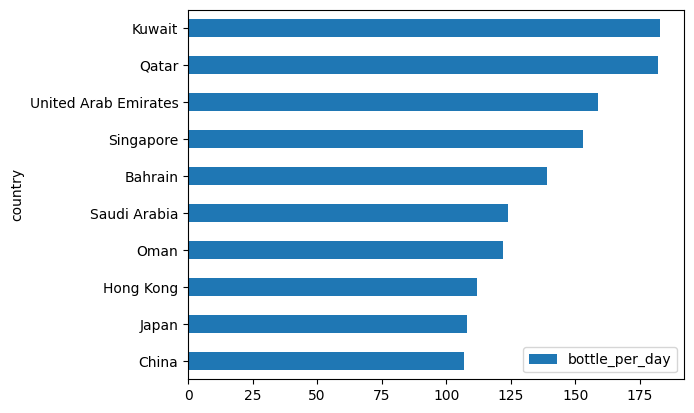

In [30]:
cleaned_df.sort_values(by='bottle_per_day').dropna().tail(10)\
    .plot(kind='barh',ylabel='country',y='bottle_per_day',x='country')

<AxesSubplot: xlabel='bottle_per_day', ylabel='mo_salary'>

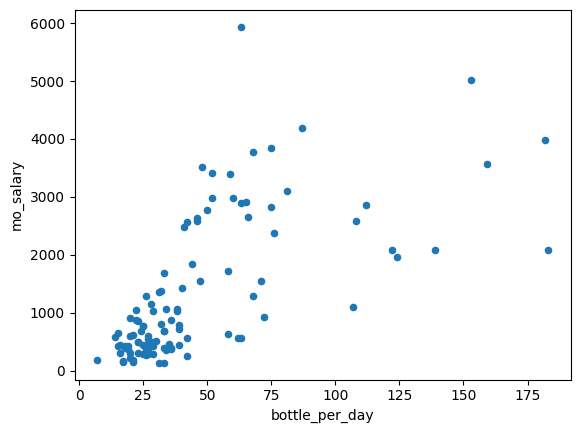

In [31]:
cleaned_df.plot(kind='scatter', y='mo_salary',x='bottle_per_day')

# Visualization

Here I attempted to plot and see if there's an relationship between daily income and coke price.

A few key findings:
- Generally speaking, coke prices are higher in countries with higher income.
- Coke are most affordable in countries with high daily salary and lower income. However, These countries doesn't have the highest daily income.
- A cluster of low-income countires have relatively higher coke prices

A few shortcomings with my analysis:
- Coke prices in some countries are missing.
- I used average income instead of median income, which may be less representative of how much people around the world make.
- Data is crowdsource, thus the quality of the data could be contested.

In [32]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [24]:
%%R

library(ggplot2)

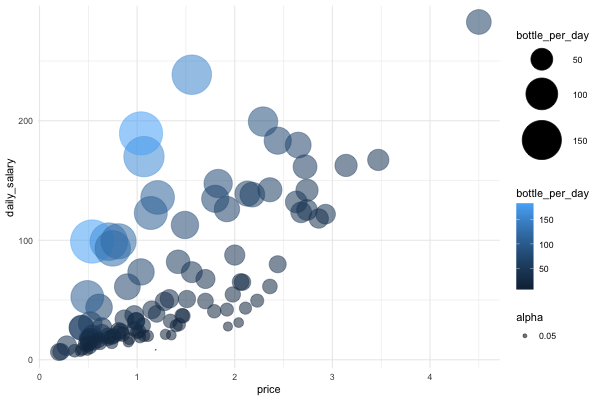

In [59]:
%%R -i cleaned_df -w 600 -h 400

ggplot(cleaned_df, aes(x=price, y=daily_salary)) + 
  geom_point(aes(col=bottle_per_day, size=bottle_per_day, alpha=0.05)) +
    scale_size(range=c(0,20)) +
    theme_minimal()
#     scale_color_gradient(low = "blue", high = "red")

In [66]:
%%R
library(plotly)
require(plotly)

In [80]:
import plotly.express as px

In [86]:


fig = px.scatter(cleaned_df, x="price", y="daily_salary",\
                color="bottle_per_day",\
                 hover_name="country", log_x=True, size_max=50)
fig.show()